<a href="https://colab.research.google.com/github/teethavattcp/teethavat_data_sci_port/blob/main/Projects/02_Churn_Prediction_%26_Retention_Strategies_for_Telecom_Business/Churn_Prediction_%26_Retention_Strategies_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction and Retention Strategies for Telecom business**

##Chapter 3: Process

# 3.1) Importing Data & Exploring Data

In [ ]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## 3.1.1) Importing Data

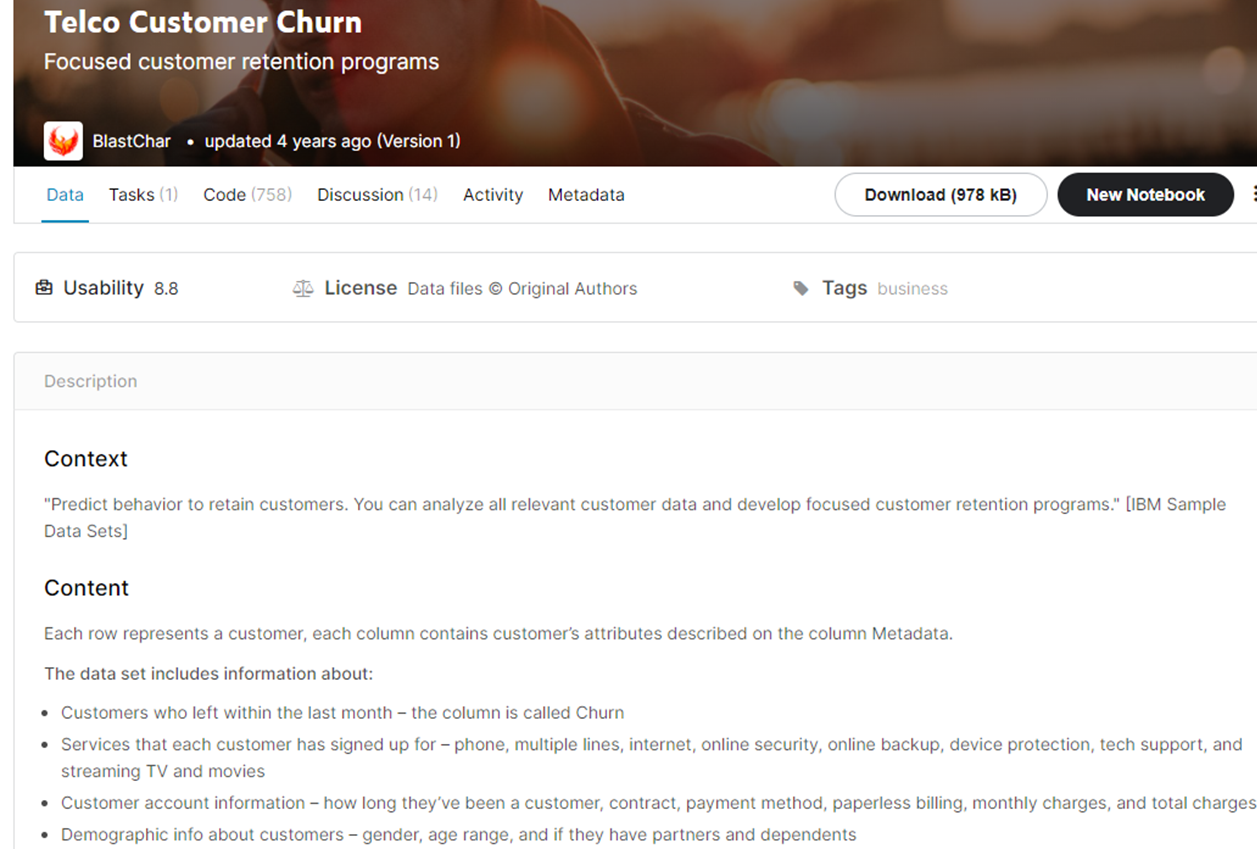

https://drive.google.com/file/d/1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl/view?usp=sharing

In [ ]:
!gdown https://drive.google.com/uc?id=1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl

Downloading...
From: https://drive.google.com/uc?id=1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl
To: /content/watson.csv
100% 978k/978k [00:00<00:00, 126MB/s]


In [ ]:
df = pd.read_csv('watson.csv', header=0, delimiter=",")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3.1.2) Exploring Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data type of `'TotalCharges'` seem suspricious as it should be continuous(float64).

In [ ]:
for col in df.columns:
    print ("-------- %s --------" % col)
    print (df[col].value_counts())

-------- customerID --------
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
-------- gender --------
Male      3555
Female    3488
Name: gender, dtype: int64
-------- SeniorCitizen --------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------- Partner --------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------- Dependents --------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------- tenure --------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------- PhoneService --------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------- MultipleLines --------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------- Internet

No duplication of `'customerID'`

No     5174
Yes    1869
Name: Churn, dtype: int64

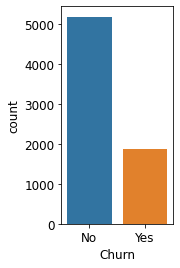

In [ ]:
plt.rcParams.update({'font.size': 12})
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Churn',data=df, ax=ax)
df['Churn'].value_counts()

Classes in target attribute are imbalance then stratify sampling should be used for spliting data in buiding classification model.

# 3.2) Data Preprocessing for predictive task models

## 3.2.1) Handling missing data

Converting 'TotalCharges' from categorical data to numeric data

In [ ]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
list(df['TotalCharges'].sort_values(ascending = True))[0:20]

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05']

### Set invalid parsing as null value

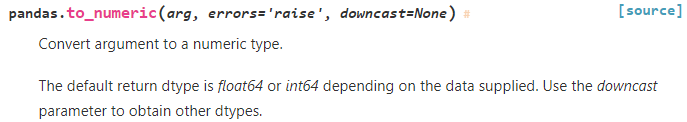

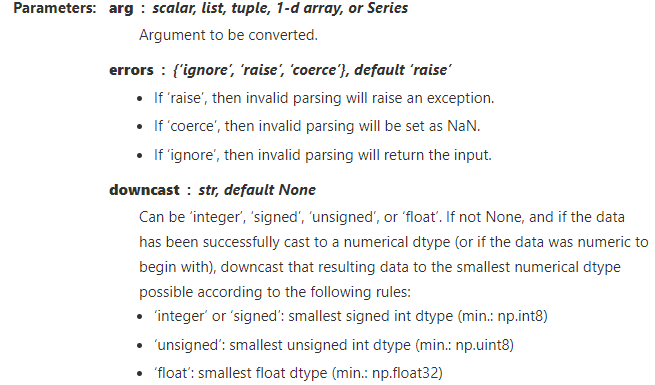

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

### Substitute nulls with mean

In [ ]:
df['TotalCharges'].mean()

2283.3004408418656

In [ ]:
df.TotalCharges = df.TotalCharges.fillna(df['TotalCharges'].mean())
df['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


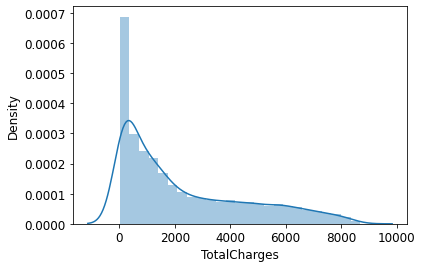

In [ ]:
sns.distplot(df['TotalCharges'])

In [ ]:
df_cl = df.copy(deep = True)

## 3.2.2) Converting categorical variable to dummy variable by one-hot Encoding

In [ ]:
for col in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']:
  df = pd.concat([df,pd.get_dummies(df[col],drop_first=False, prefix=col)],axis=1)
  df.drop([col],axis=1,inplace=True)
df.drop('Churn_No',axis=1,inplace=True)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2.3) Data field Reduction

### Eliminate insignificant datafields

In [ ]:
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7039,2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
7040,4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,4,74.40,306.60,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,1


Assign `index = 'customerID'` for later being used to join in generating association rules mining after clustering that what customerID belongs to which cluster

ใช้ `index = 'customerID'` เพื่อเก็บไว้ join ตอนทำ clustering ว่ามี ID อะไรบ้างที่อยู่ในแต่ละคลัสเตอร์ (join กันทีหลัง)

In [ ]:
df_cf = df.copy(deep = True)
df_cf.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


สร้าง dataframe ใหม่เพื่อไว้ใช้สำหรับ classification โดยทำการ drop id เพื่อไว้ใช้สำหรับเรียกดูชื่อลูกค้าที่มีผลการทำนายตามคลาสของตัวแปรเป้าหมาย

In [ ]:
df_cf.drop('customerID',axis=1,inplace=True)

In [ ]:
df.set_index('customerID', inplace = True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df_cf

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1


# 3.3) Generating classification models

In [ ]:
from sklearn.model_selection import train_test_split
X = df_cf.drop('Churn_Yes',axis=1)
y = df_cf['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=2565)

In [ ]:
import time
start = time.time()

## 3.3.5) XGBoost


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### Hyperparameter Tuning

In [ ]:

# Hyperparameter Tuning XGBoost Classifier

xg = XGBClassifier(n_jobs=-1)

from sklearn.model_selection import GridSearchCV

param_grid = [
{'max_depth': [3, 6 , 9], 'learning_rate': [0.001, 0.01, 0.1, 0.3], 
 'subsample': [0.5, 0.7, 1.0],'tree_method':['auto', 'exact', 'approx', 'hist', 'gpu_hist']}
]

grid_search_xg = GridSearchCV(xg, param_grid, cv=10, scoring='f1_macro', n_jobs = -1)
grid_search_xg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", li

GridSearchCV(cv=10, estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1, 0.3],
                          'max_depth': [3, 6, 9], 'subsample': [0.5, 0.7, 1.0],
                          'tree_method': ['auto', 'exact', 'approx', 'hist',
                                          'gpu_hist']}],
             scoring='f1_macro')

In [ ]:
grid_search_xg.best_estimator_

XGBClassifier(n_jobs=-1, subsample=1.0, tree_method='auto')

### Fit Model with fine-tuned parameters

In [ ]:
clf_xgb = grid_search_xg.best_estimator_.fit(X_train, y_train)

In [ ]:
#xgb=XGBClassifier(n_jobs=-1, subsample=1.0, tree_method='auto')

In [ ]:
#clf_xgb = xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = clf_xgb.predict(X_test) # predict class

In [ ]:
X_test.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

### Evaluate Model

In [ ]:
# Classification Report XGBoost
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Confusion Metrix Random Forest
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_xgb))

Confusion Matrix:
[[935 100]
 [179 195]]


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print('XGBoost')
print('F1-score = ', f1_score(y_test, y_pred_xgb, average='macro'))
print('Accuracy = ', accuracy_score(y_test, y_pred_xgb))

XGBoost
F1-score =  0.7265659071796873
Accuracy =  0.8019872249822569


In [ ]:
stop = time.time()
print("The time of the run:", stop - start)

The time of the run: 1239.6779382228851


## Compare each classification model

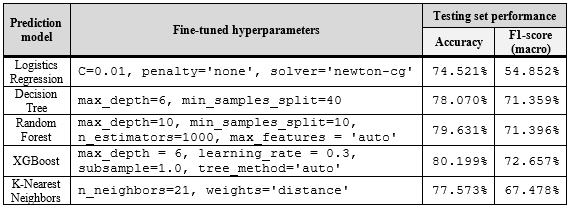

Considered model performance from F1-score, XGBoost classification model performed the best.

### Create predicted class from the best classification model

In [ ]:
y_pred_xgb_full = clf_xgb.predict(X)
df['Predicted Churn'] = y_pred_xgb_full

In [ ]:
df_cl['Predicted Churn'] = y_pred_xgb_full
df_cl.drop(['Churn'],axis=1,inplace=True)

### Export predicted data

In [ ]:
df_cl.to_excel('data_for_visualize.xlsx')

In [ ]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Predicted Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df.drop(['Churn_Yes'],axis=1,inplace=True)

In [ ]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Predicted Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df.to_csv('data_for_clustering.csv')

0    5521
1    1522
Name: Predicted Churn, dtype: int64

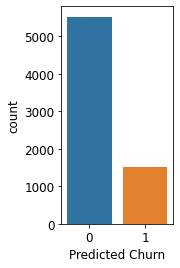

In [ ]:
plt.rcParams.update({'font.size': 12})
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Predicted Churn',data=df, ax=ax)
df['Predicted Churn'].value_counts()

In [ ]:
print (df['Predicted Churn'].value_counts())

0    5521
1    1522
Name: Predicted Churn, dtype: int64


In [ ]:
print(list(df[df['Predicted Churn']==1].index))

['7590-VHVEG', '9237-HQITU', '9305-CDSKC', '7892-POOKP', '8779-QRDMV', '6467-CHFZW', '8665-UTDHZ', '4929-XIHVW', '3413-BMNZE', '6047-YHPVI', '5380-WJKOV', '8168-UQWWF', '7760-OYPDY', '9420-LOJKX', '7495-OOKFY', '1658-BYGOY', '0434-CSFON', '5698-BQJOH', '5919-TMRGD', '9191-MYQKX', '4445-ZJNMU', '2424-WVHPL', '8637-XJIVR', '4598-XLKNJ', '4846-WHAFZ', '5299-RULOA', '0404-SWRVG', '4412-YLTKF', '2876-GZYZC', '3091-FYHKI', '0390-DCFDQ', '2135-RXIHG', '3874-EQOEP', '6551-GNYDG', '4482-EWFMI', '3376-BMGFE', '1875-QIVME', '2656-FMOKZ', '5947-SGKCL', '6317-YPKDH', '6582-OIVSP', '9367-WXLCH', '1918-ZBFQJ', '1024-GUALD', '2472-OVKUP', '7018-WBJNK', '1285-OKIPP', '7841-TZDMQ', '4195-NZGTA', '6496-JDSSB', '9408-SSNVZ', '2232-DMLXU', '8937-RDTHP', '1251-KRREG', '9903-LYSAB', '0094-OIFMO', '9947-OTFQU', '4629-NRXKX', '9514-JDSKI', '7273-TEFQD', '3606-TWKGI', '4385-GZQXV', '6366-ZGQGL', '4716-HHKQH', '5940-AHUHD', '6432-TWQLB', '4484-GLZOU', '5583-SXDAG', '3488-PGMQJ', '7534-BFESC', '4847-TAJYI', '6851

In [ ]:
print(list(df[df['Predicted Churn']==0].index))

['5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '1452-KIOVK', '6713-OKOMC', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4190-MFLUW', '4183-MYFRB', '1680-VDCWW', '1066-JKSGK', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '5248-YGIJN', '8773-HHUOZ', '3841-NFECX', '6827-IEAUQ', '7310-EGVHZ', '6234-RAAPL', '6572-ADKRS', '8865-TNMNX', '9489-DEDVP', '9867-JCZSP', '4671-VJLCL', '4080-IIARD', '3714-NTNFO', '5948-UJZLF', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '6575-SUVOI', '4667-QONEA', '8769-KKTPH', '5067-XJQFU', '3957-SQXML', '5954-BDFSG', '1215-FIGMP', '0526-SXDJP', '0557-ASKVU', '5122-CYFXA', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '7410-OIEDU', '2273-QCKXA', '0731-EBJQB', '1891-QRQSA', '8028-PNXHQ', '5630-AHZIL', '2673-CXQEU', '6416-JNVRK', '5590-ZSKRV', '0191-ZHSKZ', '3887-PBQAO', '8108-UXRQN', '9919-YLNNG', '0318-ZOPWS', '4808-YNLEU', '1862-QRWPE', '2796-NNUFI', '3016-KSVCP', '4767-HZZHQ', '7233-PAHHL', '6067

In [ ]:
df_u = df.copy(deep = True)

# 3.4) Feature Importance

In [ ]:
clf_xgb.get_booster().get_score(importance_type='gain')

{'Contract_Month-to-month': 230.84394215795243,
 'MonthlyCharges': 5.971032977476136,
 'OnlineSecurity_No': 30.273669021391303,
 'TotalCharges': 4.914385549910447,
 'InternetService_Fiber optic': 62.19434040692307,
 'tenure': 16.78501492932979,
 'Contract_One year': 7.6380530653333345,
 'TechSupport_No': 49.22503321999999,
 'PaymentMethod_Electronic check': 13.455572338399998,
 'StreamingMovies_Yes': 11.416977878571428,
 'PaperlessBilling_No': 9.049262391750002,
 'Contract_Two year': 12.315643041294118,
 'StreamingTV_Yes': 10.878139498571427,
 'OnlineBackup_No': 8.663989152111112,
 'SeniorCitizen': 5.661249484722222,
 'MultipleLines_No': 6.8524703814375,
 'OnlineSecurity_Yes': 7.01914835,
 'StreamingTV_No': 11.1996346,
 'Dependents_No': 4.2295379870000005,
 'gender_Female': 2.490333053111111,
 'PaymentMethod_Bank transfer (automatic)': 2.4845456119999993,
 'StreamingMovies_No': 3.5477908466666666,
 'PhoneService_No': 1.7155011519999999,
 'Partner_No': 1.6163955929999998,
 'PaymentMetho

In [ ]:
sum(clf_xgb.get_booster().get_score(importance_type='gain').values())

533.4531136122856

In [ ]:
clf_xgb.feature_importances_

array([0.01061246, 0.03146484, 0.01119317, 0.0092124 , 0.00466833,
       0.        , 0.00303006, 0.        , 0.0079286 , 0.        ,
       0.00321584, 0.        , 0.0128455 , 0.        , 0.0065028 ,
       0.        , 0.1165882 , 0.        , 0.05675038, 0.        ,
       0.01315795, 0.01624133, 0.        , 0.        , 0.        ,
       0.        , 0.00587864, 0.09227621, 0.        , 0.        ,
       0.0209946 , 0.        , 0.02039193, 0.00665061, 0.        ,
       0.02140203, 0.4327352 , 0.01431813, 0.02308665, 0.01696356,
       0.        , 0.00465748, 0.00909952, 0.02522353, 0.00291004],
      dtype=float32)

In [ ]:
clf_xgb.importance_type

'gain'

Text(0, 0.5, 'Features')

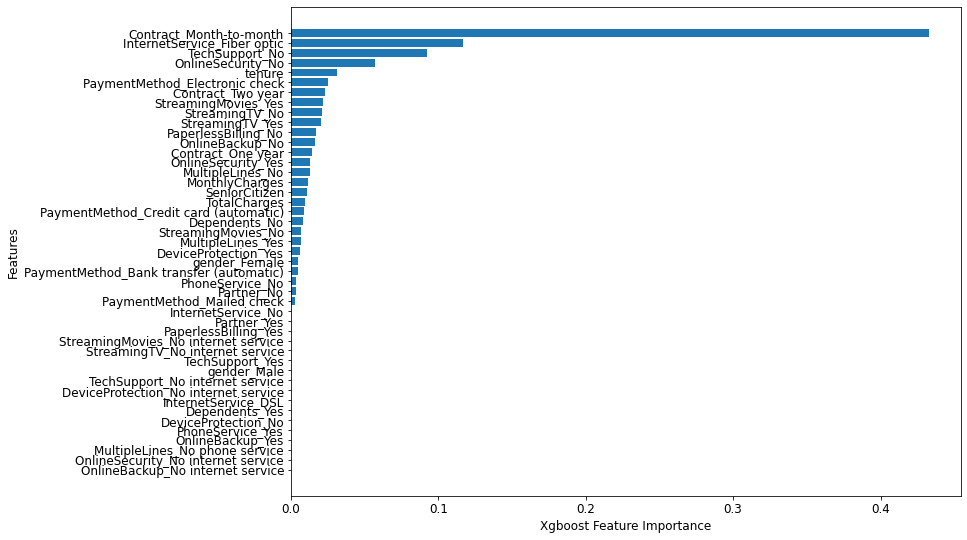

In [ ]:
figsize = plt.subplots(figsize = (12, 9))
sorted_idx = clf_xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf_xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.ylabel("Features")

In [ ]:
df_feature_importance = pd.DataFrame([], columns = ["feature", "feature importance"])
for importance, name in sorted(zip(clf_xgb.feature_importances_, X_train.columns),reverse=True):
  to_append = [name, importance]
  df_length = len(df_feature_importance)
  df_feature_importance.loc[df_length] = to_append

In [ ]:
df_feature_importance

,feature,feature importance
0,Contract_Month-to-month,0.432735
1,InternetService_Fiber optic,0.116588
2,TechSupport_No,0.092276
3,OnlineSecurity_No,0.056750
4,tenure,0.031465
5,PaymentMethod_Electronic check,0.025224
6,Contract_Two year,0.023087
7,StreamingMovies_Yes,0.021402
8,StreamingTV_No,0.020995
9,StreamingTV_Yes,0.020392


# 3.5) K-mean Clustering

In [ ]:
df_u

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Predicted Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


## Data Preparation for k-means clustering

### 3.5.1 Data Selection

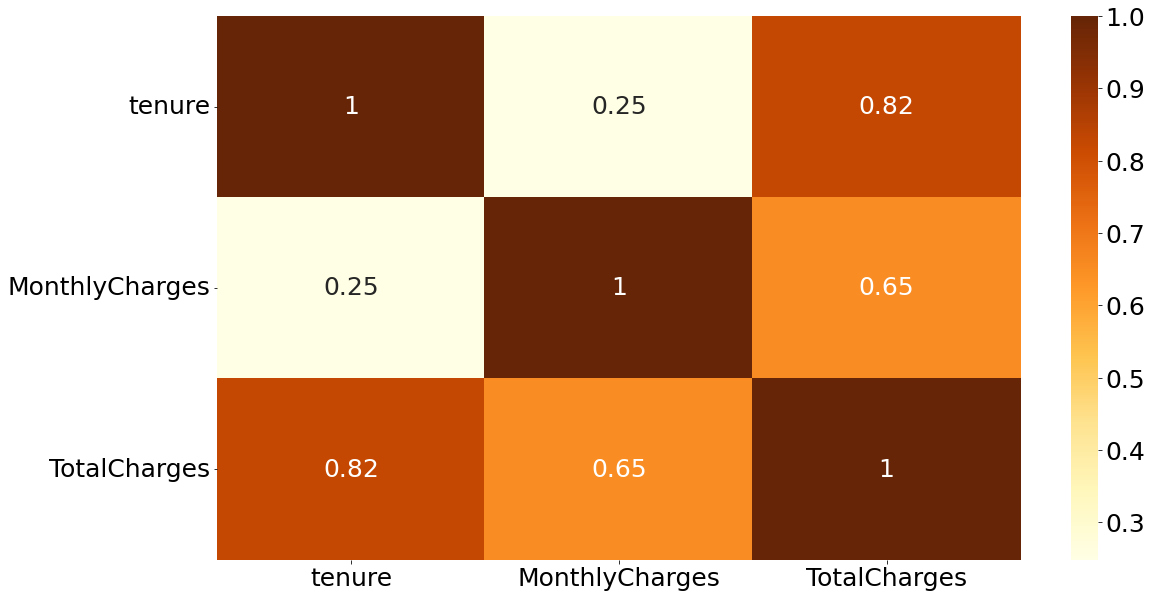

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (18,10))
plt.rcParams.update({'font.size': 25})
sns.heatmap(df_u[['tenure','MonthlyCharges','TotalCharges']].corr(), annot =True, cmap = 'YlOrBr') 

It was found that the variable 'TotalCharges' has strong correlation at 0.82 and 0.65 with the variable 'tenure' and 'MonthlyCharges', respectively, so that 'TotalCharges' was omitted to avoid problems in providing weights for discriminating data in clustering.

In [ ]:
df_loyal = df_u[df_u['Predicted Churn']==0]
df_churn = df_u[df_u['Predicted Churn']==1]

In [ ]:
df_loyal = df_loyal[['tenure','MonthlyCharges']]
df_churn = df_churn[['tenure','MonthlyCharges']]

In [ ]:
X_churn = df_churn[df_churn.columns[:]].to_numpy(dtype=np.float32)
X_loyal = df_loyal[df_loyal.columns[:]].to_numpy(dtype=np.float32)

In [ ]:
df_loyal

,tenure,MonthlyCharges
customerID,,
5575-GNVDE,34,56.95
3668-QPYBK,2,53.85
7795-CFOCW,45,42.30
1452-KIOVK,22,89.10
6713-OKOMC,10,29.75
...,...,...
2569-WGERO,72,21.15
6840-RESVB,24,84.80
2234-XADUH,72,103.20


In [ ]:
X_loyal 

array([[ 34.  ,  56.95],
       [  2.  ,  53.85],
       [ 45.  ,  42.3 ],
       ...,
       [ 72.  , 103.2 ],
       [ 11.  ,  29.6 ],
       [ 66.  , 105.65]], dtype=float32)

In [ ]:
X_churn

array([[ 1.  , 29.85],
       [ 2.  , 70.7 ],
       [ 8.  , 99.65],
       ...,
       [ 6.  , 44.4 ],
       [ 1.  , 75.75],
       [ 4.  , 74.4 ]], dtype=float32)

In [ ]:
df_churn

,tenure,MonthlyCharges
customerID,,
7590-VHVEG,1,29.85
9237-HQITU,2,70.70
9305-CDSKC,8,99.65
7892-POOKP,28,104.80
8779-QRDMV,1,39.65
...,...,...
0723-DRCLG,1,74.45
1122-JWTJW,1,70.65
2235-DWLJU,6,44.40


In [ ]:
df_churn.describe()

,tenure,MonthlyCharges
count,1522.000000,1522.000000
mean,9.996058,78.640802
std,11.425256,19.237939
min,1.000000,19.450000
25%,1.000000,70.700000
50%,5.000000,80.550000
75%,14.000000,93.550000
max,58.000000,113.200000


### 3.5.2 Z-transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
Z_churn = scaler.fit_transform(X_churn)
Z_loyal = scaler.transform(X_loyal)

In [ ]:
X_churn

array([[ 1.  , 29.85],
       [ 2.  , 70.7 ],
       [ 8.  , 99.65],
       ...,
       [ 6.  , 44.4 ],
       [ 1.  , 75.75],
       [ 4.  , 74.4 ]], dtype=float32)

In [ ]:
Z_churn

array([[-0.78764224, -2.5370097 ],
       [-0.70008814, -0.4129036 ],
       [-0.17476317,  1.0924301 ],
       ...,
       [-0.3498715 , -1.780443  ],
       [-0.78764224, -0.15031505],
       [-0.5249798 , -0.22051185]], dtype=float32)

In [ ]:
Z_churn.mean()

-4.2295016e-09

In [ ]:
Z_churn.std()

1.0

### 3.5.3 Find #cluster 

#### Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1,10+1)
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(Z_churn)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 13.54it/s]


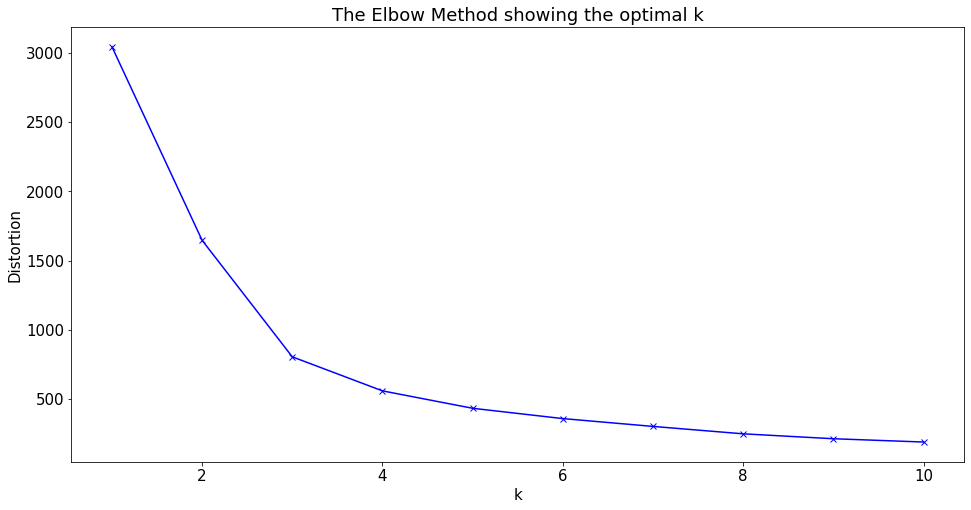

In [ ]:
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 15})
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In the elbow method, it can be grouped into three clusters as the bending point where the slope had changed significantly occurred between the number of clusters at three (k=3). 

In [ ]:
for i in range(len(distortions)-1):
  print(str(i+1) + "-->" + str(i+2) + ": Diff = " + str(distortions[i+1] - distortions[i]))

1-->2: Diff = -1397.1640625
2-->3: Diff = -841.0717163085938
3-->4: Diff = -245.76336669921875
4-->5: Diff = -125.65728759765625
5-->6: Diff = -74.40203857421875
6-->7: Diff = -56.4522705078125
7-->8: Diff = -53.50103759765625
8-->9: Diff = -35.42047119140625
9-->10: Diff = -23.808975219726562


In [ ]:
for i in range(1,len(distortions)-1):
  print('k = ' +str(i+1) + ": Ratio = " + str(1/(distortions[i+1] - distortions[i])*(distortions[i] - distortions[i-1])))

k = 2: Ratio = 1.661171140829771
k = 3: Ratio = 3.4222826925135355
k = 4: Ratio = 1.9558226299307981
k = 5: Ratio = 1.6888957615362719
k = 6: Ratio = 1.317963616076738
k = 7: Ratio = 1.0551621621313292
k = 8: Ratio = 1.5104552762312413
k = 9: Ratio = 1.487694067658114


#### Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sihouette = []
models_ = []
K = list(range(2, 10+1))
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(Z_churn)
    models_.append(model)
    sihouette.append(silhouette_score(Z_churn, model.labels_))

In [ ]:
sihouette

[0.45140317,
 0.5414007,
 0.45653278,
 0.4470116,
 0.45781437,
 0.4594137,
 0.4670002,
 0.47217718,
 0.4344017]

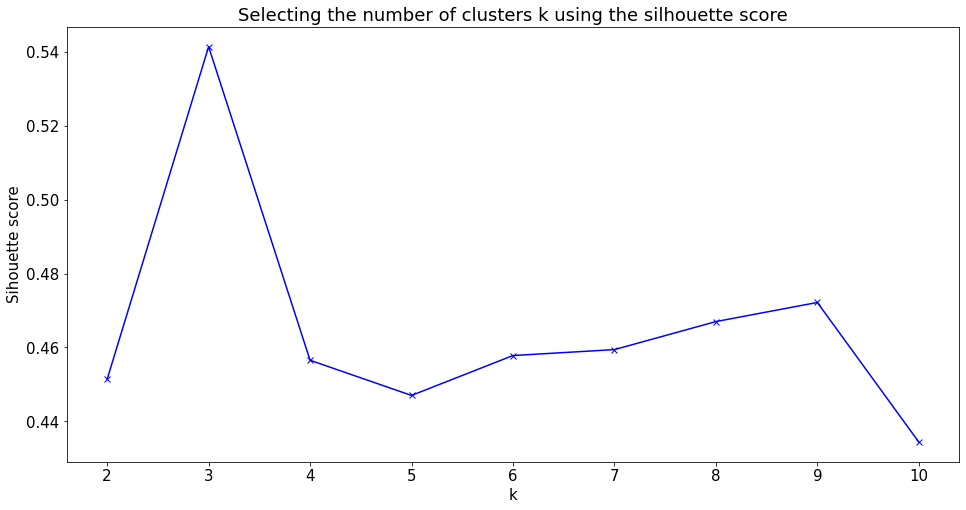

In [ ]:
# Plotting the silhouette score of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, sihouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Sihouette score')
plt.title('Selecting the number of clusters k using the silhouette score')
plt.show()

Corresponding with the elbow method, the number of groups assessed from silhouette score was found to be three (k=3), where the value of silhouette score at three cluster was 0.5414, which was maximum and closed to 1.

## 3.5.4 Build K-means clustering model

In [ ]:
model = KMeans(n_clusters=3, random_state= 2565) 
model.fit(Z_churn)
y_pred_churn = model.predict(Z_churn)
y_pred_loyal = model.predict(Z_loyal)

## 3.5.5 Clustering Result

In [ ]:
cluster_pred_churn = list(y_pred_churn)
cluster_pred_loyal = list(y_pred_loyal)

In [ ]:
df_churn['cluster']=cluster_pred_churn
df_loyal['cluster'] = cluster_pred_loyal

In [ ]:
df_churn

,tenure,MonthlyCharges,cluster
customerID,,,
7590-VHVEG,1,29.85,1
9237-HQITU,2,70.70,0
9305-CDSKC,8,99.65,0
7892-POOKP,28,104.80,2
8779-QRDMV,1,39.65,1
...,...,...,...
0723-DRCLG,1,74.45,0
1122-JWTJW,1,70.65,0
2235-DWLJU,6,44.40,1


In [ ]:
df_churn.to_excel('cluster_churn.xlsx')

In [ ]:
print(list(df_churn[df_churn.cluster==0].index))

['9237-HQITU', '9305-CDSKC', '4929-XIHVW', '6047-YHPVI', '8168-UQWWF', '7760-OYPDY', '9420-LOJKX', '7495-OOKFY', '5698-BQJOH', '5919-TMRGD', '9191-MYQKX', '4445-ZJNMU', '2424-WVHPL', '8637-XJIVR', '5299-RULOA', '0404-SWRVG', '2876-GZYZC', '0390-DCFDQ', '3874-EQOEP', '6551-GNYDG', '4482-EWFMI', '3376-BMGFE', '1875-QIVME', '2656-FMOKZ', '5947-SGKCL', '9367-WXLCH', '1918-ZBFQJ', '2472-OVKUP', '7018-WBJNK', '1285-OKIPP', '6496-JDSSB', '9408-SSNVZ', '8937-RDTHP', '9903-LYSAB', '0094-OIFMO', '9947-OTFQU', '4629-NRXKX', '3606-TWKGI', '4385-GZQXV', '5940-AHUHD', '6432-TWQLB', '5583-SXDAG', '3488-PGMQJ', '4847-TAJYI', '6390-DSAZX', '8098-LLAZX', '8266-VBFQL', '2799-ARNLO', '7563-BIUPC', '5701-YVSVF', '5804-LEPIM', '2739-CACDQ', '0122-OAHPZ', '2868-SNELZ', '0021-IKXGC', '2034-GDRCN', '4115-NZRKS', '0219-YTZUE', '4572-DVCGN', '1010-DIAUQ', '0259-GBZSH', '5167-ZFFMM', '0334-GDDSO', '5564-NEMQO', '8734-DKSTZ', '4110-PFEUZ', '5168-MSWXT', '1452-VOQCH', '0880-TKATG', '3811-VBYBZ', '9399-APLBT', '0306

In [ ]:
print(list(df_churn[df_churn.cluster==1].index))

['7590-VHVEG', '8779-QRDMV', '8665-UTDHZ', '3413-BMNZE', '3091-FYHKI', '2135-RXIHG', '6317-YPKDH', '6582-OIVSP', '1024-GUALD', '7841-TZDMQ', '4195-NZGTA', '2232-DMLXU', '1251-KRREG', '9514-JDSKI', '7273-TEFQD', '6366-ZGQGL', '8705-WZCYL', '6158-HDPXZ', '0224-RLWWD', '3583-EKAPL', '6778-YSNIH', '6235-VDHOM', '0887-HJGAR', '0822-GAVAP', '0067-DKWBL', '5896-NPFWW', '1589-AGTLK', '0322-CHQRU', '2207-NHRJK', '3050-GBUSH', '9227-LUNBG', '5543-QDCRY', '4208-UFFGW', '9117-SHLZX', '3748-FVMZZ', '5669-SRAIP', '0841-NULXI', '0411-EZJZE', '5868-CZJDR', '5673-FSSMF', '3165-HDOEW', '5552-ZNFSJ', '2833-SLKDQ', '4030-VPZBD', '6260-ONULR', '7537-RBWEA', '1768-ZAIFU', '3334-CTHOL', '7767-UXAGJ', '8445-DNBAE', '0661-XEYAN', '7881-EVUAD', '4237-RLAQD', '5047-LHVLY', '0375-HVGXO', '3877-JRJIP', '7511-YMXVQ', '6519-CFDBX', '6650-VJONK', '8080-DDEMJ', '8356-WUAOJ', '2485-ITVKB', '3669-OYSJI', '1612-EOHDH', '6702-OHFWR', '7054-LGEQW', '3961-SXAXY', '3566-HJGPK', '4193-ORFCL', '1636-NTNCO', '6637-KYRCV', '3946

In [ ]:
print(list(df_churn[df_churn.cluster==2].index))

['7892-POOKP', '6467-CHFZW', '5380-WJKOV', '1658-BYGOY', '0434-CSFON', '4598-XLKNJ', '4846-WHAFZ', '4412-YLTKF', '4716-HHKQH', '4484-GLZOU', '7534-BFESC', '6851-WEFYX', '0265-EDXBD', '2840-XANRC', '9601-BRXPO', '3597-MVHJT', '3951-NJCVI', '5233-AOZUF', '0771-WLCLA', '8313-NDOIA', '2359-KMGLI', '4612-SSVHJ', '5609-CEBID', '8397-MVTAZ', '0939-YAPAF', '6030-REHUX', '1626-ERCMM', '1766-GKNMI', '5244-IRFIH', '6683-VLCTZ', '4289-DTDKW', '0115-TFERT', '6103-BOCOU', '9904-EHEVJ', '7028-DVOIQ', '5382-SOYZL', '1989-PRJHP', '8818-XYFCQ', '8436-BJUMM', '1751-NCDLI', '7029-RPUAV', '8111-SLLHI', '1641-RQDAY', '6507-ZJSUR', '6393-WRYZE', '8621-MNIHH', '9885-AIBVB', '2692-BUCFV', '3211-AAPKX', '7079-QRCBC', '9851-QXEEQ', '9809-IMGCQ', '3254-YRILK', '6032-KRXXO', '8017-LXHFA', '6352-TWCAU', '6267-DCFFZ', '2439-LYPMQ', '9490-DFPMD', '6311-UEUME', '4423-YLHDV', '7279-BUYWN', '4816-LXZYW', '9606-PBKBQ', '8058-DMYRU', '6651-AZVTJ', '5692-ICXLW', '3858-VOBET', '9172-JITSM', '6298-QDFNH', '9961-JBNMK', '8290

0    997
2    283
1    242
Name: cluster, dtype: int64

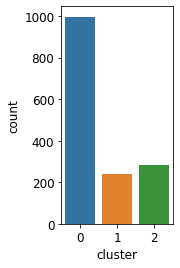

In [ ]:
plt.rcParams.update({'font.size': 12})
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='cluster',data=df_churn, ax=ax)
df_churn['cluster'].value_counts()

In [ ]:
df_loyal

,tenure,MonthlyCharges,cluster
customerID,,,
5575-GNVDE,34,56.95,2
3668-QPYBK,2,53.85,1
7795-CFOCW,45,42.30,2
1452-KIOVK,22,89.10,2
6713-OKOMC,10,29.75,1
...,...,...,...
2569-WGERO,72,21.15,2
6840-RESVB,24,84.80,2
2234-XADUH,72,103.20,2


In [ ]:
print(list(df_loyal[df_loyal.cluster==0].index))

['8773-HHUOZ', '4080-IIARD', '5122-CYFXA', '7410-OIEDU', '5630-AHZIL', '3071-VBYPO', '4080-OGPJL', '3466-BYAVD', '3780-YVMFA', '6371-NZYEG', '6727-IOTLZ', '2070-FNEXE', '8544-GOQSH', '0221-WMXNQ', '3179-GBRWV', '3583-KRKMD', '5686-CMAWK', '7916-VCCPB', '5605-IYGFG', '4360-PNRQB', '2937-FTHUR', '1304-BCCFO', '4431-EDMIQ', '6227-HWPWX', '2501-XWWTZ', '3701-SFMUH', '7319-VENRZ', '6967-QIQRV', '5756-JYOJT', '0719-SYFRB', '5172-MIGPM', '5839-SUYVZ', '4765-OXPPD', '4957-TREIR', '5433-KYGHE', '6923-JHPMP', '1410-RSCMR', '0139-IVFJG', '3137-NYQQI', '5173-WXOQV', '0295-QVKPB', '7905-TVXTA', '3671-SHRSP', '2719-BDAQO', '0297-RBCSG', '5146-CBVOE', '5709-LVOEQ', '8584-KMVXD', '3234-VKACU', '9524-EGPJC', '4184-TJFAN', '7296-PIXQY', '1624-WOIWJ', '7143-BQIBA', '4646-QZXTF', '9763-PDTKK', '1047-NNCBF', '0927-LCSMG', '8257-RZAHR', '0774-IFUVM', '9553-DLCLU', '1346-UFHAX', '8399-YNDCH', '4660-IRIBM', '4468-KAZHE', '7126-RBHSD', '0013-MHZWF', '9824-BEMCV', '1373-ORVIZ', '0872-JCPIB', '0384-RVBPI', '4741

In [ ]:
print(list(df_loyal[df_loyal.cluster==1].index))

['3668-QPYBK', '6713-OKOMC', '9763-GRSKD', '7469-LKBCI', '4190-MFLUW', '1680-VDCWW', '1066-JKSGK', '7310-EGVHZ', '8865-TNMNX', '9867-JCZSP', '5948-UJZLF', '3957-SQXML', '0557-ASKVU', '2273-QCKXA', '5590-ZSKRV', '8108-UXRQN', '2796-NNUFI', '3016-KSVCP', '0278-YXOOG', '6380-ARCEH', '3679-XASPY', '6180-YBIQI', '9750-BOOHV', '9560-BBZXK', '8402-OOOHJ', '2928-HLDBA', '6497-TILVL', '7219-TLZHO', '3930-ZGWVE', '2372-HWUHI', '7799-LGRDP', '6837-BJYDQ', '3077-RSNTJ', '2749-CTKAJ', '7554-NEWDD', '8992-VONJD', '2907-ILJBN', '1159-WFSGR', '5918-VUKWP', '1744-JHKYS', '4827-USJHP', '8167-GJLRN', '0956-SYCWG', '9178-JHUVJ', '3645-DEYGF', '4709-LKHYG', '6469-MRVET', '0742-MOABM', '5961-VUSRV', '6778-JFCMK', '1984-GPTEH', '0621-JFHOL', '9227-UAQFT', '4522-AKYLR', '0322-YINQP', '3675-YDUPJ', '4959-JOSRX', '5046-NUHWD', '8645-KWHJO', '4130-MZLCC', '0314-TKOSI', '8229-MYEJZ', '2080-SRCDE', '3808-HFKDE', '3580-REOAC', '1563-IWQEX', '8203-XJZRC', '1098-TDVUQ', '7102-JJVTX', '5697-GOMBF', '9385-EHGDO', '9498

In [ ]:
print(list(df_loyal[df_loyal.cluster==2].index))

['5575-GNVDE', '7795-CFOCW', '1452-KIOVK', '6388-TABGU', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS', '3655-SNQYZ', '8191-XWSZG', '9959-WOFKT', '4183-MYFRB', '3638-WEABW', '6322-HRPFA', '6865-JZNKO', '5248-YGIJN', '3841-NFECX', '6827-IEAUQ', '6234-RAAPL', '6572-ADKRS', '9489-DEDVP', '4671-VJLCL', '3714-NTNFO', '7639-LIAYI', '2954-PIBKO', '8012-SOUDQ', '6575-SUVOI', '4667-QONEA', '8769-KKTPH', '5067-XJQFU', '5954-BDFSG', '1215-FIGMP', '0526-SXDJP', '8627-ZYGSZ', '3410-YOQBQ', '3170-NMYVV', '0731-EBJQB', '1891-QRQSA', '8028-PNXHQ', '2673-CXQEU', '6416-JNVRK', '0191-ZHSKZ', '3887-PBQAO', '9919-YLNNG', '0318-ZOPWS', '4808-YNLEU', '1862-QRWPE', '4767-HZZHQ', '7233-PAHHL', '6067-NGCEU', '9848-JQJTX', '9803-FTJCG', '3212-KXOCR', '7123-WQUHX', '5386-THSLQ', '3192-NQECA', '6728-DKUCO', '8597-CWYHH', '2848-YXSMW', '0486-HECZI', '4549-ZDQYY', '5712-AHQNN', '5256-SKJGO', '9445-ZUEQE', '1091-SOZGA', '4622-YNKIJ', '6734-PSBAW', '2639-UGMAZ', '6207-WIOLX', '8587-XYZSF', '7850-VWJUU', '3774-VBNXY', '6217

In [ ]:
df_loyal.to_excel('cluster_loyal.xlsx')

2    3409
1    1751
0     361
Name: cluster, dtype: int64

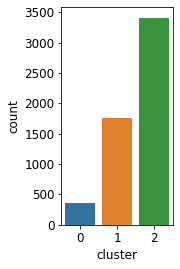

In [ ]:
plt.rcParams.update({'font.size': 12})
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='cluster',data=df_loyal, ax=ax)
df_loyal['cluster'].value_counts()

In [ ]:
df_Z_0_churn = df_churn[df_churn['cluster']==0]
df_Z_1_churn = df_churn[df_churn['cluster']==1]
df_Z_2_churn = df_churn[df_churn['cluster']==2]

In [ ]:
id_for_cluster_0 = list(df_Z_0_churn.index)
id_for_cluster_1 = list(df_Z_1_churn.index)
id_for_cluster_2 = list(df_Z_2_churn.index)

In [ ]:
cluster_churn = {0:[],1:[],2:[]} #{(cluster)th : memberindex_in_cluster}
for i in range(len(cluster_pred_churn)):
  cluster_churn[cluster_pred_churn[i]].append(i+1)
  
cluster_loyal = {0:[],1:[],2:[]} #{(cluster)th : memberindex_in_cluster}
for i in range(len(cluster_pred_loyal)):
  cluster_loyal[cluster_pred_loyal[i]].append(i+1)

In [ ]:
num_var = ['tenure', 'MonthlyCharges']

In [ ]:
df_Z_churn = pd.DataFrame(Z_churn, index = list(range(1,Z_churn.shape[0]+1)),columns = num_var)

In [ ]:
df_Z_0_churn = df_Z_churn.loc[cluster_churn[0]]
df_Z_1_churn = df_Z_churn.loc[cluster_churn[1]]
df_Z_2_churn = df_Z_churn.loc[cluster_churn[2]]

In [ ]:
df_Z_0_churn_mean = df_Z_0_churn.mean(axis = 0)
df_Z_1_churn_mean = df_Z_1_churn.mean(axis = 0)
df_Z_2_churn_mean = df_Z_2_churn.mean(axis = 0)

In [ ]:
df_Z_0_churn_mean

tenure           -0.340563
MonthlyCharges    0.227255
dtype: float32

In [ ]:
import matplotlib.pyplot as plt
df_cluster_churn = pd.DataFrame({
    'cluster 0': list(df_Z_0_churn_mean),
    'cluster 1': list(df_Z_1_churn_mean),
    'cluster 2': list(df_Z_2_churn_mean)
    }, index = num_var)

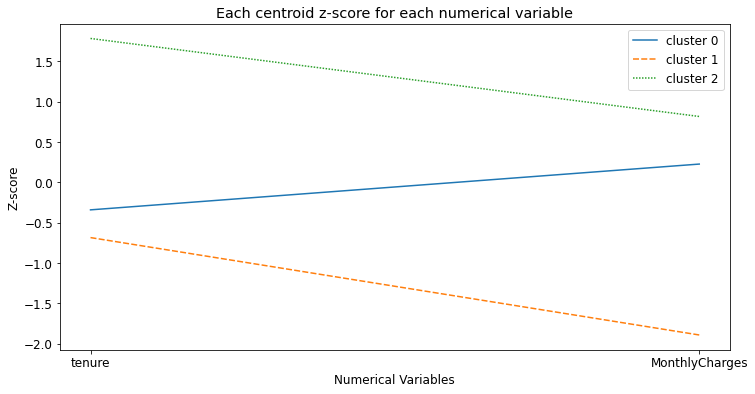

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Numerical Variables')
plt.ylabel('Z-score')
plt.title('Each centroid z-score for each numerical variable')
sns.lineplot(data=df_cluster_churn)

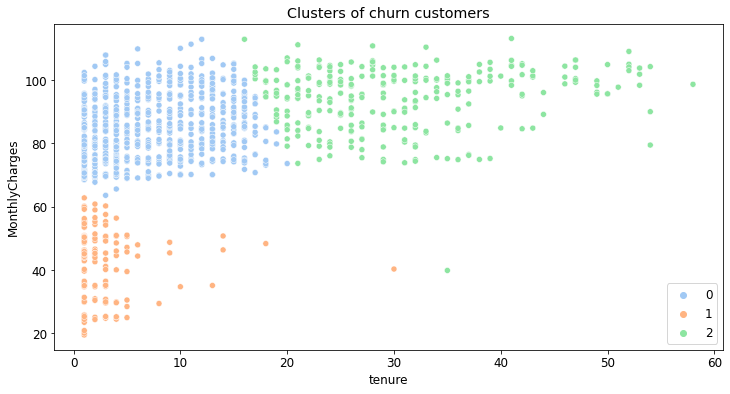

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Clusters of churn customers')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
sns.scatterplot(x=X_churn[:,0], y= X_churn[:,1], hue=y_pred_churn, palette="pastel")

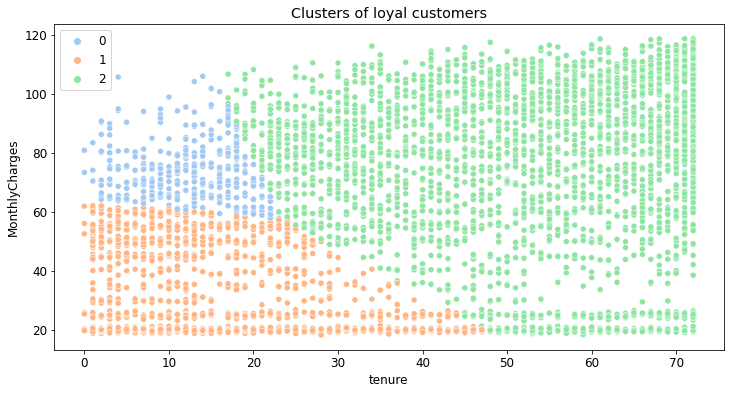

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Clusters of loyal customers')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
sns.scatterplot(x=X_loyal[:,0], y= X_loyal[:,1], hue=y_pred_loyal, palette="pastel")

In [ ]:
df_cluster_churn

,cluster 0,cluster 1,cluster 2
tenure,-0.340563,-0.684531,1.785151
MonthlyCharges,0.227255,-1.892421,0.817641


In [ ]:
s =([[-0.340563,  0.227255],[ -0.684531,  -1.892421],[1.785152,  0.817642]])

In [ ]:
scaler.inverse_transform(s)

array([[ 6.10631684, 83.01128298],
       [ 2.17768566, 42.24648331],
       [30.3851749 , 94.36538039]])

In [ ]:
df_churn_1 = df_cl[df_cl['Predicted Churn']==1]
df_churn_1['cluster']=cluster_pred_churn
df_churn_1.to_excel('churn_cluster_analysis.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_loyal_1 = df_cl[df_cl['Predicted Churn']==0]
df_loyal_1['cluster']=cluster_pred_loyal
df_loyal_1.to_excel('loyal_cluster_analysis.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 3.6) Association Rule Mining


## 3.6.1 Data & Attribute Selection

In [ ]:
df_churn = df_cl[df_cl['Predicted Churn']==1]
df_churn.index = np.arange(1, len(df_churn)+1)

df_loyal = df_cl[df_cl['Predicted Churn']==0]
df_loyal.index = np.arange(1, len(df_loyal)+1)

In [ ]:
drop_cols_association_rule = ['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','Contract','PaymentMethod','MonthlyCharges','TotalCharges','PaperlessBilling']

In [ ]:
selected_cols_products = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                                      'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']

In [ ]:
selected_cols_products_no_InternetService_Fiber_optic = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                                      'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']

## 3.6.2 Generating association rules

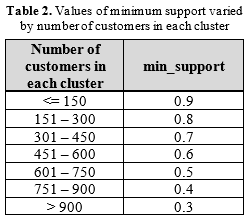

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minimum_support = 0.5
minimum_support_churn_0 = 0.3 #997
minimum_support_churn_1 = 0.8 #242
minimum_support_churn_2 = 0.8 #283
minimum_support_loyal_0 = 0.7 #361
minimum_support_loyal_1 = 0.3 #1751
minimum_support_loyal_2 = 0.3 #3409
minimum_confidence = 0.8
minimum_lift = 1

### Churn Cluster 0

In [ ]:
df_churn_0 = df_churn.loc[cluster_churn[0]]
df_churn_0 = df_churn_0.drop(columns = drop_cols_association_rule)
df_churn_0 = pd.get_dummies(df_churn_0)
df_churn_0 = df_churn_0[selected_cols_products]

In [ ]:
frequent_itemsets = apriori(df_churn_0, min_support=minimum_support_churn_0, use_colnames=True)
res_churn_0 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_churn_0 = res_churn_0[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_churn_0 = res1_churn_0[res1_churn_0['lift'] > minimum_lift]
res2_churn_0

,antecedents,consequents,support,confidence,lift
5,(MultipleLines_Yes),(InternetService_Fiber optic),0.461384,0.995671,1.000689
9,"(PhoneService_Yes, MultipleLines_Yes)",(InternetService_Fiber optic),0.461384,0.995671,1.000689
10,(MultipleLines_Yes),"(InternetService_Fiber optic, PhoneService_Yes)",0.461384,0.995671,1.000689


In [ ]:
len(res2_churn_0)

3

In [ ]:
res2_churn_0.to_excel("churn_cluster_0.xlsx")

In [ ]:
res3_churn_0 = res2_churn_0[['antecedents' , 'consequents']]

### Loyal Cluster 0

In [ ]:
df_loyal_0 = df_loyal.loc[cluster_loyal[0]]
df_loyal_0 = df_loyal_0.drop(columns = drop_cols_association_rule)
df_loyal_0 = pd.get_dummies(df_loyal_0)
df_loyal_0 = df_loyal_0[selected_cols_products]

In [ ]:
frequent_itemsets = apriori(df_loyal_0, min_support=minimum_support_loyal_0, use_colnames=True)
res_loyal_0 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_loyal_0 = res_loyal_0[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_loyal_0 = res1_loyal_0[res1_loyal_0['lift'] > minimum_lift]
res2_loyal_0

,antecedents,consequents,support,confidence,lift


In [ ]:
res2_loyal_0.to_excel("loyal_cluster_0.xlsx")

In [ ]:
res3_loyal_0 = res2_loyal_0[['antecedents' , 'consequents']]

### Churn Cluster 1 

In [ ]:
df_churn_1 = df_churn.loc[cluster_churn[1]]
df_churn_1 = df_churn_1.drop(columns = drop_cols_association_rule)
df_churn_1 = pd.get_dummies(df_churn_1)
df_churn_1 = df_churn_1[selected_cols_products_no_InternetService_Fiber_optic]

In [ ]:
frequent_itemsets = apriori(df_churn_1, min_support=minimum_support_churn_1, use_colnames=True)
res_churn_1 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_churn_1 = res_churn_1[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_churn_1 = res1_churn_1[res1_churn_1['lift'] > minimum_lift ]
res2_churn_1

,antecedents,consequents,support,confidence,lift


In [ ]:
res2_churn_1.to_excel("churn_cluster_1.xlsx")

In [ ]:
res3_churn_1 = res2_churn_1[['antecedents' , 'consequents']]

### Loyal Cluster 1

In [ ]:
df_loyal_1 = df_loyal.loc[cluster_loyal[1]]
df_loyal_1 = df_loyal_1.drop(columns = drop_cols_association_rule)
df_loyal_1= pd.get_dummies(df_loyal_1)
df_loyal_1 = df_loyal_1[selected_cols_products_no_InternetService_Fiber_optic]

In [ ]:
frequent_itemsets = apriori(df_loyal_1, min_support=minimum_support_loyal_1, use_colnames=True)
res_loyal_1 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_loyal_1 = res_loyal_1[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_loyal_1 = res1_loyal_1[res1_loyal_1['lift'] > minimum_lift]
res2_loyal_1

,antecedents,consequents,support,confidence,lift


In [ ]:
res2_loyal_1.to_excel("loyal_cluster_1.xlsx")

In [ ]:
res3_loyal_1 = res2_loyal_1[['antecedents' , 'consequents']]

### Churn Cluster 2

In [ ]:
df_churn_2 = df_churn.loc[cluster_churn[2]]
df_churn_2 = df_churn_2.drop(columns = drop_cols_association_rule)
df_churn_2 = pd.get_dummies(df_churn_2)
df_churn_2 = df_churn_2[selected_cols_products]

In [ ]:
frequent_itemsets = apriori(df_churn_2, min_support=minimum_support_churn_2, use_colnames=True)
res_churn_2 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_churn_2 = res_churn_2[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_churn_2 = res1_churn_2[res1_churn_2['lift'] > minimum_lift]
res2_churn_2

,antecedents,consequents,support,confidence,lift
0,(PhoneService_Yes),(MultipleLines_Yes),0.897527,0.900709,1.003546
1,(MultipleLines_Yes),(PhoneService_Yes),0.897527,1.000000,1.003546
2,(InternetService_Fiber optic),(PhoneService_Yes),0.996466,1.000000,1.003546
3,(PhoneService_Yes),(InternetService_Fiber optic),0.996466,1.000000,1.003546
4,(InternetService_Fiber optic),(MultipleLines_Yes),0.897527,0.900709,1.003546
5,(MultipleLines_Yes),(InternetService_Fiber optic),0.897527,1.000000,1.003546
6,"(InternetService_Fiber optic, PhoneService_Yes)",(MultipleLines_Yes),0.897527,0.900709,1.003546
7,"(InternetService_Fiber optic, MultipleLines_Yes)",(PhoneService_Yes),0.897527,1.000000,1.003546
8,"(PhoneService_Yes, MultipleLines_Yes)",(InternetService_Fiber optic),0.897527,1.000000,1.003546
9,(InternetService_Fiber optic),"(PhoneService_Yes, MultipleLines_Yes)",0.897527,0.900709,1.003546


In [ ]:
len(res2_churn_2)

12

In [ ]:
res2_churn_2.to_excel("churn_cluster_2.xlsx")

In [ ]:
res3_churn_2 = res2_churn_2[['antecedents' , 'consequents']]

### Loyal Cluster 2

In [ ]:
df_loyal_2 = df_loyal.loc[cluster_loyal[2]]
df_loyal_2 = df_loyal_2.drop(columns = drop_cols_association_rule)
df_loyal_2= pd.get_dummies(df_loyal_2)
df_loyal_2 = df_loyal_2[selected_cols_products]

In [ ]:
frequent_itemsets = apriori(df_loyal_2, min_support=minimum_support_loyal_2, use_colnames=True)
res_loyal_2 = association_rules(frequent_itemsets, metric='confidence', min_threshold=minimum_confidence)
res1_loyal_2 = res_loyal_2[['antecedents' , 'consequents' , 'support' , 'confidence' , 'lift']]
res2_loyal_2 = res1_loyal_2[res1_loyal_2['lift'] >= minimum_lift]
res2_loyal_2

,antecedents,consequents,support,confidence,lift
0,(MultipleLines_Yes),(PhoneService_Yes),0.565268,1.0,1.101098
1,(InternetService_Fiber optic),(PhoneService_Yes),0.484893,1.0,1.101098
8,"(InternetService_Fiber optic, MultipleLines_Yes)",(PhoneService_Yes),0.348196,1.0,1.101098
9,"(OnlineBackup_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.322675,1.0,1.101098
10,"(DeviceProtection_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.322089,1.0,1.101098
11,"(StreamingTV_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.336756,1.0,1.101098
12,"(StreamingMovies_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.337929,1.0,1.101098
13,"(StreamingTV_Yes, InternetService_Fiber optic)",(PhoneService_Yes),0.324142,1.0,1.101098
14,"(InternetService_Fiber optic, StreamingMovies_...",(PhoneService_Yes),0.325022,1.0,1.101098


In [ ]:
len(res2_loyal_2)

9

In [ ]:
res2_loyal_2.to_excel("loyal_cluster_2.xlsx")

In [ ]:
res3_loyal_2 = res2_loyal_2[['antecedents' , 'consequents']]

## 3.6.3 Analyzing result from association rules 

In [ ]:
#res1[    ((res1['antecedents'] == frozenset({'InternetService_Fiber optic'}))&(res1['consequents'] == frozenset({'PaperlessBilling_Yes'}))) |
 #       ((res1['antecedents'] == frozenset({'PaperlessBilling_Yes'}))&(res1['consequents'] == frozenset({'InternetService_Fiber optic'})))            ]

### Cluster 0

In [ ]:
set_churn_0 = set()
for index, row in res2_churn_0.iterrows():
     set_churn_0.add(str(row['antecedents']) + '-->' + str(row['consequents']))

In [ ]:
set_loyal_0 = set()
for index, row in res2_loyal_0.iterrows():
     set_loyal_0.add(str(row['antecedents']) + '-->' + str(row['consequents']))

#### Found only in Churn

In [ ]:
set_churn_0-set_loyal_0

{"frozenset({'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic', 'PhoneService_Yes'})",
 "frozenset({'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic'})",
 "frozenset({'PhoneService_Yes', 'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic'})"}

In [ ]:
l0=pd.merge(res2_churn_0,res2_loyal_0,on=['antecedents', 'consequents'],how="outer",indicator=True)
l0=l0[l0['_merge']=='left_only']
l0=l0[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x']]
l0

,antecedents,consequents,support_x,confidence_x,lift_x
0,(MultipleLines_Yes),(InternetService_Fiber optic),0.461384,0.995671,1.000689
1,"(PhoneService_Yes, MultipleLines_Yes)",(InternetService_Fiber optic),0.461384,0.995671,1.000689
2,(MultipleLines_Yes),"(InternetService_Fiber optic, PhoneService_Yes)",0.461384,0.995671,1.000689


In [ ]:
l0.to_excel('l0.xlsx')

#### Found only in Loyal

In [ ]:
set_loyal_0-set_churn_0

set()

In [ ]:
r0=pd.merge(res2_churn_0,res2_loyal_0,on=['antecedents', 'consequents'],how="outer",indicator=True)
r0=r0[r0['_merge']=='right_only']
r0=r0[['antecedents' , 'consequents', 'support_y',	'confidence_y', 'lift_y']]
r0

,antecedents,consequents,support_y,confidence_y,lift_y


In [ ]:
r0.to_excel('r0.xlsx')

#### Found in both Churn and Loyal

In [ ]:
set_churn_0.intersection(set_loyal_0)

set()

In [ ]:
b0 = pd.merge(res2_churn_0, res2_loyal_0, how ='inner', on =['antecedents', 'consequents'])
b0=b0[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x', 'support_y',	'confidence_y', 'lift_y']]
b0

,antecedents,consequents,support_x,confidence_x,lift_x,support_y,confidence_y,lift_y


In [ ]:
b0.to_excel('b0.xlsx')

### Cluster 1

In [ ]:
set_churn_1 = set()
for index, row in res2_churn_1.iterrows():
     set_churn_1.add(str(row['antecedents']) + '-->' + str(row['consequents']))

In [ ]:
set_loyal_1 = set()
for index, row in res2_loyal_1.iterrows():
     set_loyal_1.add(str(row['antecedents']) + '-->' + str(row['consequents']))

#### Found only in Churn

In [ ]:
set_churn_1-set_loyal_1

set()

In [ ]:
l1=pd.merge(res2_churn_1,res2_loyal_1,on=['antecedents', 'consequents'],how="outer",indicator=True)
l1=l1[l1['_merge']=='left_only']
l1=l1[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x']]
l1

,antecedents,consequents,support_x,confidence_x,lift_x


In [ ]:
l1.to_excel('l1.xlsx')

#### Found only in Loyal 

In [ ]:
set_loyal_1-set_churn_1

set()

In [ ]:
r1=pd.merge(res2_churn_1,res2_loyal_1,on=['antecedents', 'consequents'],how="outer",indicator=True)
r1=r1[r1['_merge']=='right_only']
r1=r1[['antecedents' , 'consequents', 'support_y',	'confidence_y', 'lift_y']]
r1

,antecedents,consequents,support_y,confidence_y,lift_y


In [ ]:
r1.to_excel('r1.xlsx')

#### Found in both Churn and Loyal

In [ ]:
set_churn_1.intersection(set_loyal_1)

set()

In [ ]:
b1 = pd.merge(res2_churn_1, res2_loyal_1, how ='inner', on =['antecedents', 'consequents'])
b1=b1[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x', 'support_y',	'confidence_y', 'lift_y']]
b1

,antecedents,consequents,support_x,confidence_x,lift_x,support_y,confidence_y,lift_y


In [ ]:
b1.to_excel('b1.xlsx')

### Cluster 2

In [ ]:
set_churn_2 = set()
for index, row in res2_churn_2.iterrows():
     set_churn_2.add(str(row['antecedents']) + '-->' + str(row['consequents']))

In [ ]:
set_loyal_2 = set()
for index, row in res2_loyal_2.iterrows():
     set_loyal_2.add(str(row['antecedents']) + '-->' + str(row['consequents']))

#### Found only in Churn

In [ ]:
set_churn_2-set_loyal_2

{"frozenset({'InternetService_Fiber optic', 'PhoneService_Yes'})-->frozenset({'MultipleLines_Yes'})",
 "frozenset({'InternetService_Fiber optic'})-->frozenset({'MultipleLines_Yes'})",
 "frozenset({'InternetService_Fiber optic'})-->frozenset({'PhoneService_Yes', 'MultipleLines_Yes'})",
 "frozenset({'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic', 'PhoneService_Yes'})",
 "frozenset({'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic'})",
 "frozenset({'PhoneService_Yes', 'MultipleLines_Yes'})-->frozenset({'InternetService_Fiber optic'})",
 "frozenset({'PhoneService_Yes'})-->frozenset({'InternetService_Fiber optic', 'MultipleLines_Yes'})",
 "frozenset({'PhoneService_Yes'})-->frozenset({'InternetService_Fiber optic'})",
 "frozenset({'PhoneService_Yes'})-->frozenset({'MultipleLines_Yes'})"}

In [ ]:
l2=pd.merge(res2_churn_2,res2_loyal_2,on=['antecedents', 'consequents'],how="outer",indicator=True)
l2=l2[l2['_merge']=='left_only']
l2=l2[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x']]
l2

,antecedents,consequents,support_x,confidence_x,lift_x
0,(PhoneService_Yes),(MultipleLines_Yes),0.897527,0.900709,1.003546
3,(PhoneService_Yes),(InternetService_Fiber optic),0.996466,1.000000,1.003546
4,(InternetService_Fiber optic),(MultipleLines_Yes),0.897527,0.900709,1.003546
5,(MultipleLines_Yes),(InternetService_Fiber optic),0.897527,1.000000,1.003546
6,"(InternetService_Fiber optic, PhoneService_Yes)",(MultipleLines_Yes),0.897527,0.900709,1.003546
8,"(PhoneService_Yes, MultipleLines_Yes)",(InternetService_Fiber optic),0.897527,1.000000,1.003546
9,(InternetService_Fiber optic),"(PhoneService_Yes, MultipleLines_Yes)",0.897527,0.900709,1.003546
10,(PhoneService_Yes),"(InternetService_Fiber optic, MultipleLines_Yes)",0.897527,0.900709,1.003546
11,(MultipleLines_Yes),"(InternetService_Fiber optic, PhoneService_Yes)",0.897527,1.000000,1.003546


In [ ]:
l2.to_excel('l2.xlsx')

#### Found only in Loyal 

In [ ]:
set_loyal_2-set_churn_2

{"frozenset({'DeviceProtection_Yes', 'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'InternetService_Fiber optic', 'StreamingMovies_Yes'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'OnlineBackup_Yes', 'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'StreamingMovies_Yes', 'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'StreamingTV_Yes', 'InternetService_Fiber optic'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'StreamingTV_Yes', 'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})"}

In [ ]:
r2=pd.merge(res2_churn_2,res2_loyal_2,on=['antecedents', 'consequents'],how="outer",indicator=True)
r2=r2[r2['_merge']=='right_only']
r2=r2[['antecedents' , 'consequents', 'support_y',	'confidence_y', 'lift_y']]
r2

,antecedents,consequents,support_y,confidence_y,lift_y
12,"(OnlineBackup_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.322675,1.0,1.101098
13,"(DeviceProtection_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.322089,1.0,1.101098
14,"(StreamingTV_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.336756,1.0,1.101098
15,"(StreamingMovies_Yes, MultipleLines_Yes)",(PhoneService_Yes),0.337929,1.0,1.101098
16,"(StreamingTV_Yes, InternetService_Fiber optic)",(PhoneService_Yes),0.324142,1.0,1.101098
17,"(InternetService_Fiber optic, StreamingMovies_...",(PhoneService_Yes),0.325022,1.0,1.101098


In [ ]:
r2.to_excel('r2.xlsx')

#### Found in both Churn and Loyal

In [ ]:
set_churn_2.intersection(set_loyal_2)

{"frozenset({'InternetService_Fiber optic', 'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'InternetService_Fiber optic'})-->frozenset({'PhoneService_Yes'})",
 "frozenset({'MultipleLines_Yes'})-->frozenset({'PhoneService_Yes'})"}

In [ ]:
b2 = pd.merge(res2_churn_2, res2_loyal_2, how ='inner', on =['antecedents', 'consequents'])
b2=b2[['antecedents' , 'consequents', 'support_x',	'confidence_x', 'lift_x', 'support_y',	'confidence_y', 'lift_y']]
b2

,antecedents,consequents,support_x,confidence_x,lift_x,support_y,confidence_y,lift_y
0,(MultipleLines_Yes),(PhoneService_Yes),0.897527,1.0,1.003546,0.565268,1.0,1.101098
1,(InternetService_Fiber optic),(PhoneService_Yes),0.996466,1.0,1.003546,0.484893,1.0,1.101098
2,"(InternetService_Fiber optic, MultipleLines_Yes)",(PhoneService_Yes),0.897527,1.0,1.003546,0.348196,1.0,1.101098


In [ ]:
b2.to_excel('b2.xlsx')